# 1. Introdução
Este estudo tem como objetivo analisar o comportamento de uma carteira de investimentos, composta por ações brasileiras, durante o período da pandemia do COVID-19. O python e algumas bibliotecas sao utilizadas como ferramentas para tratar e analisar os dados. Através de uma análise exploratória dos dados (EDA), é avaliado o risco de cada ativo, individualmente, e da carteira como um todo. Para esse último, também é examinado o nível de diversificação da carteira, como uma forma auxiliar de entender o risco. A análise cobre os períodos antes e depois da pandemia de COVID-19 (2019-2021), permitindo comparar o comportamento dos ativos em diferentes cenários econômicos.


# 2. EDA e PPG

#### Dados
Os dados deste estudo foram disponibilizados pela plataforma do curso de Análise e Ciencia de Dados da *Preditiva*.


## 2.1. Data Pré-Processing

In [4]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


In [5]:
# Carregar o arquivo Excel
df = pd.read_excel('dados.xlsx')

In [6]:
# Verificar as primeiras linhas do DataFrame
df.head()

,Data,Acao,Empresa,Preço_de_Fechamento
0,2021-08-27,PETR4.SA,Petrobras,28.490000
1,2021-08-27,LAME4.SA,Lojas Americanas,5.950000
2,2021-08-27,VALE3.SA,Vale,100.690002
3,2021-08-27,CRFB3.SA,Rede Atacadao,18.750000
4,2021-08-27,MULT3.SA,Multiplan,21.480000


In [7]:
df.tail()

,Data,Acao,Empresa,Preço_de_Fechamento
4915,2019-08-30,KLBN11.SA,Klabin,15.060000
4916,2019-08-30,RENT3.SA,Localiza,44.799999
4917,2019-08-30,ARZZ3.SA,Arezzo&Co,49.480000
4918,2019-08-30,SULA11.SA,SulAmerica,44.844460
4919,2019-08-30,B3SA3.SA,B3,14.933333


In [8]:
# Ordenar o DataFrame pela coluna 'Data' em ordem crescente
df = df.sort_values(by='Data').reset_index(drop=True)

# Verificar as primeiras linhas do DataFrame após a ordenação e reindexação
df.head()

,Data,Acao,Empresa,Preço_de_Fechamento
0,2019-08-30,B3SA3.SA,B3,14.933333
1,2019-08-30,PETR4.SA,Petrobras,25.500000
2,2019-08-30,LAME4.SA,Lojas Americanas,18.666086
3,2019-08-30,VALE3.SA,Vale,45.570000
4,2019-08-30,CRFB3.SA,Rede Atacadao,22.299999


In [9]:
# Verificar informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 4920 non-null   datetime64[ns]
 1   Acao                 4920 non-null   object        
 2   Empresa              4920 non-null   object        
 3   Preço_de_Fechamento  4920 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 153.9+ KB


In [10]:
# Verificar se há valores duplicados
df.duplicated().sum()

0

In [22]:
# Contagem de ações únicas
print('Quantidade de ações: \n', df['Acao'].nunique())

# Value Counts
print(df['Acao'].value_counts())

Quantidade de ações: 
 10
Acao
B3SA3.SA     492
PETR4.SA     492
LAME4.SA     492
VALE3.SA     492
CRFB3.SA     492
SULA11.SA    492
KLBN11.SA    492
RENT3.SA     492
ARZZ3.SA     492
MULT3.SA     492
Name: count, dtype: int64


In [12]:
# Estatísticas descritivas de cada ação
df.groupby('Acao')['Preço_de_Fechamento'].describe()

,count,mean,std,min,25%,50%,75%,max
Acao,,,,,,,,
ARZZ3.SA,492.0,63.846382,15.764060,33.029999,52.967500,62.604999,72.522499,100.809998
B3SA3.SA,492.0,17.002947,2.389922,10.150000,15.451666,17.000000,18.680000,22.466665
CRFB3.SA,492.0,20.454675,1.465398,17.129999,19.327500,20.210000,21.469999,24.549999
KLBN11.SA,492.0,22.616585,4.589003,12.810000,18.970000,23.799999,26.054999,31.240000
LAME4.SA,492.0,23.609784,6.496267,5.250000,20.527214,23.925000,27.299015,36.517979
MULT3.SA,492.0,24.473313,4.152308,17.200001,21.510000,23.365001,26.585000,35.520000
PETR4.SA,492.0,24.696098,4.403501,11.290000,21.905000,25.830000,28.325000,31.120001
RENT3.SA,492.0,52.264320,11.787735,23.309999,42.387737,53.290001,62.992501,73.930000
SULA11.SA,492.0,40.474254,7.551753,24.527929,34.597499,39.996906,44.106307,62.032520


A tabela fornecida mostra as estatísticas descritivas dos preços de fechamento agrupado por cada ação da carteira. Vamos analisar os principais pontos:

- Contagem (count):
Todas as ações têm 492 observações, indicando que os dados são completos e não há valores ausentes para os preços de fechamento.

- Média (mean):
A média dos preços de fechamento varia significativamente entre as ações. Por exemplo, VALE3.SA tem a maior média (71.48), enquanto B3SA3.SA tem a menor (17.00).

- Desvio padrão (std):
O desvio padrão indica a volatilidade dos preços de fechamento. VALE3.SA tem o maior desvio padrão (25.26), sugerindo maior volatilidade, enquanto B3SA3.SA tem o menor (2.38), indicando menor volatilidade.

- Mínimo (min) e Máximo (max):
Os valores mínimos e máximos mostram a faixa de preços de fechamento. VALE3.SA tem a maior faixa (34.09 a 118.72), enquanto B3SA3.SA tem a menor (10.15 a 22.46).

- Quartis (25%, 50%, 75%):
Os quartis fornecem uma visão sobre a distribuição dos preços de fechamento. Por exemplo, para VALE3.SA, 25% dos preços estão abaixo de 50.48, 50% estão abaixo de 60.70, e 75% estão abaixo de 97.09.
Comparando os quartis, podemos ver que ações como ARZZ3.SA e VALE3.SA têm uma distribuição mais ampla de preços, enquanto ações como B3SA3.SA e CRFB3.SA têm uma distribuição mais estreita.

Avaliação Geral
- VALE3.SA: Apresenta a maior média e desvio padrão, indicando que é a ação mais cara e mais volátil da carteira.
- ARZZ3.SA: Também tem uma média alta e um desvio padrão significativo, indicando volatilidade.
- B3SA3.SA: Tem a menor média e desvio padrão, sugerindo que é a ação menos cara e menos volátil.
- LAME4.SA: Tem uma média baixa e um desvio padrão moderado, indicando que é uma ação de menor preço com volatilidade moderada.
- PETR4.SA: Tem uma média e desvio padrão intermediários, indicando volatilidade moderada.

## 2.2. Análise Exploratória dos Dados


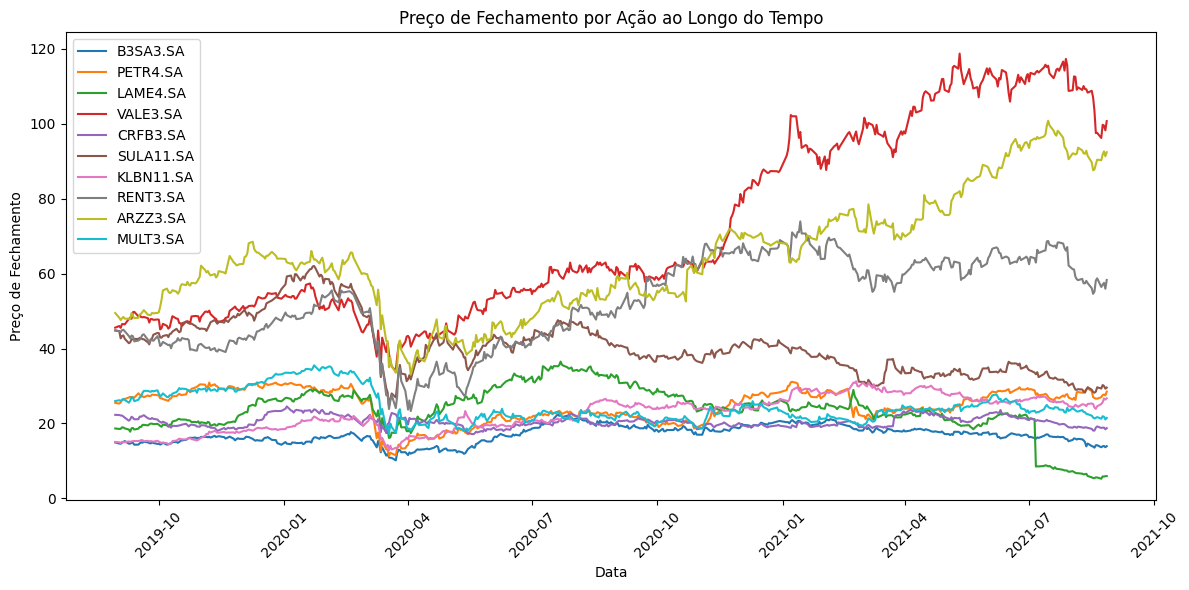

In [13]:
# Gráfico de linha para o preço de fechamento ao longo do tempo
plt.figure(figsize=(12, 6))
for acao in df['Acao'].unique():
    data = df[df['Acao'] == acao]
    plt.plot(data['Data'], data['Preço_de_Fechamento'], label=acao)
plt.title('Preço de Fechamento por Ação ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Com base no gráfico, é possível notar vários aspectos importantes sobre o desempenho das ações ao longo do tempo:

**1. Desempenho geral**: A maioria das ações sofreu uma queda acentuada em março de 2020, coincidindo com o início da pandemia de COVID-19. Após a queda, houve uma recuperação gradual para a maioria das ações, embora em ritmos diferentes.

**2. Antes da pandemia (até fevereiro de 2020)**: A maioria das ações apresentava uma tendência de alta ou estabilidade. VALE3.SA e ARZZ3.SA mostravam um desempenho particularmente forte.

**3. Depois da pandemia (a partir de março de 2020)**: Todas as ações sofreram quedas significativas em março de 2020 e, apesar disso, a maioria das ações começou a se recuperar nos meses seguintes, apesar de com padrões diferentes.

**4. Desempenho específico**:
- VALE3.SA: Sofreu uma queda significativa, mas teve uma recuperação notável, superando seu nível pré-pandemia e atingindo novos picos.
- ARZZ3.SA: Também teve uma forte recuperação, chegando a níveis superiores aos do período pré-pandemia.
- LAME4.SA: Apresentou o pior desempenho, com uma queda acentuada e contínua após a pandemia, sem sinais claros de recuperação.
- PETR4.SA: Sofreu uma queda significativa e, embora tenha se recuperado parcialmente, não retornou aos níveis pré-pandemia.
- CRFB3.SA: Mostrou uma das menores quedas e manteve-se relativamente estável após a recuperação inicial.

**5. Padrões de recuperação**:
- Algumas ações, como VALE3.SA e ARZZ3.SA, não só se recuperaram como superaram significativamente seus níveis pré-pandemia.
- Outras, como LAME4.SA e PETR4.SA, tiveram dificuldades em se recuperar e permaneceram abaixo dos níveis pré-pandemia.
- A maioria das ações sinalizam uma maior volatilidade após o início da pandemia.

Em resumo, o gráfico mostra que a pandemia teve um impacto significativo em todas as ações, mas a intensidade e a duração desse impacto variaram consideravelmente. Empresas como VALE3.SA e ARZZ3.SA demonstraram maior resiliência e capacidade de recuperação, enquanto LAME4.SA foi a mais afetada negativamente. Dessa forma, o setor de atuação parece ter influenciado significativamente o desempenho durante e após o choque inicial da pandemia.


# 3. Risco

## 3.1. Análise de Risco dos Ativos da Carteira

Neste estudo, risco de um ativo é definido como a volatilidade de seus retornos, representada pelo desvio padrão de cada ativo - medida comum entre gestores de ativos para comparar o nível de risco dos ativos. 

Vamos calcular e analisar o risco dos ativos desta carteira, ordenando-os em ordem decrescente de volatilidade.

Metodologia:

1. Calcular os retornos diários para cada ação.
2. Computar o desvio padrão desses retornos (volatilidade).
3. Ordenar os ativos do mais volátil ao menos volátil.

Volatilidade (risco) dos ativos em ordem decrescente:
Acao
LAME4.SA     0.044137
RENT3.SA     0.037242
PETR4.SA     0.035737
MULT3.SA     0.033550
ARZZ3.SA     0.030046
B3SA3.SA     0.029321
SULA11.SA    0.028872
VALE3.SA     0.028569
KLBN11.SA    0.024451
CRFB3.SA     0.022916
Name: Retorno, dtype: float64


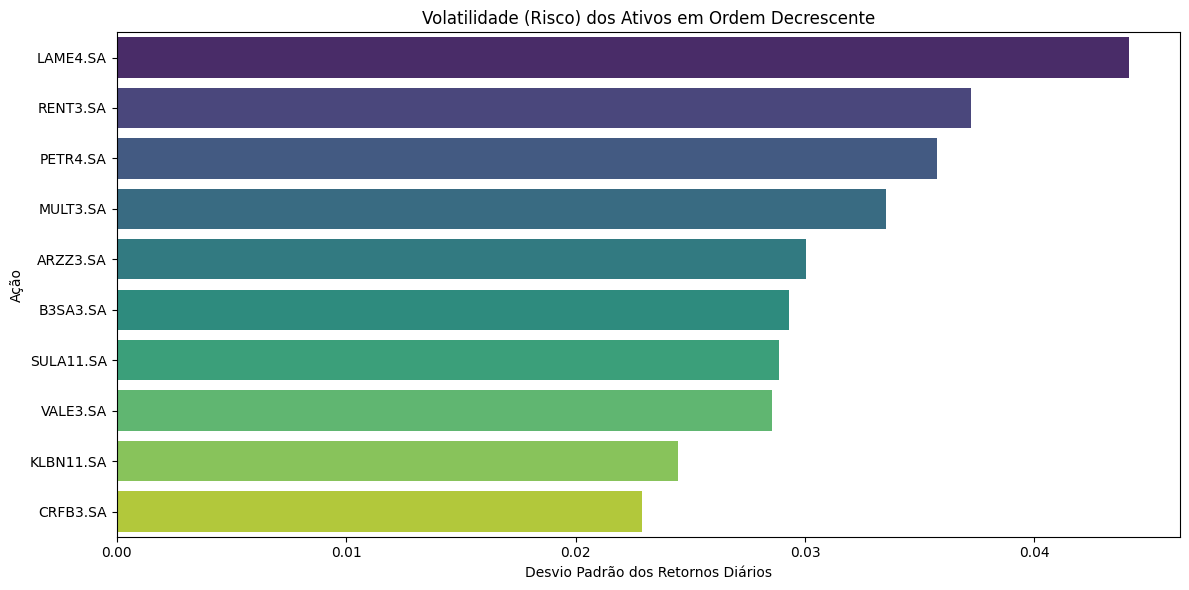

In [14]:
# Calcular os retornos diários
df['Retorno'] = df.groupby('Acao')['Preço_de_Fechamento'].pct_change()

# Calcular o desvio padrão dos retornos (volatilidade) para cada ação
volatilidade = df.groupby('Acao')['Retorno'].std().sort_values(ascending=False)

# Mostrar a volatilidade em ordem decrescente
print("Volatilidade (risco) dos ativos em ordem decrescente:")
print(volatilidade)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=volatilidade.values, y=volatilidade.index, palette='viridis')
plt.title('Volatilidade (Risco) dos Ativos em Ordem Decrescente')
plt.xlabel('Desvio Padrão dos Retornos Diários')
plt.ylabel('Ação')
plt.tight_layout()
plt.show()

A análise dos resultados revela uma volatilidade variada entre os ativos, com alguns, como LAME4.SA e RENT3.SA, se destacando com volatilidades superiores.

A LAME4.SA (Lojas Americanas) é a ação que apresenta o maior risco, com uma volatilidade de 4,41%. Esse alto nível de volatilidade pode ser atribuído à sensibilidade do setor de varejo a mudanças econômicas, aos desafios específicos enfrentados pela empresa e à vulnerabilidade a notícias e especulações do mercado.

Em seguida, foram encontradas ações com risco intermediário, como RENT3.SA (Localiza) e PETR4.SA (Petrobras), com volatilidades de 3,72% e 3,57%, respectivamente. Embora essas ações apresentem volatilidade acima da média, seus níveis são consideravelmente inferiores ao da LAME4.SA. Isso pode ser explicado pela sensibilidade da Localiza a ciclos econômicos e pela exposição da Petrobras às flutuações nos preços de commodities.

Por outro lado, a CRFB3.SA (Carrefour Brasil) se destaca como a ação com a menor volatilidade da carteira, com apenas 2,29%. Essa estabilidade pode ser atribuída à natureza do setor de varejo alimentar, que tende a ser menos sensível a ciclos econômicos, além de uma possível gestão de riscos eficiente por parte da empresa.

De maneira geral, a maioria das ações apresenta volatilidade entre 2,2% e 3,7%, o que indica um perfil de risco moderado. A diferença significativa entre a maior e a menor volatilidade, que varia de 4,41% a 2,29%, sugere uma carteira diversificada em termos de perfil de risco.

## 3.2. O risco de cada ação foi o mesmo nos períodos antes e depois da pandemia?

Esta é uma pergunta crucial para entender o impacto da pandemia no mercado de ações brasileiro. Para responder adequadamente, deve-se analisar a volatilidade das ações nos períodos pré e pós-pandemia.

Vamos comparar a volatilidade em dois períodos:
1. Antes da pandemia: até fevereiro de 2020
2. Depois da pandemia: a partir de março de 2020

Após executar o código abaixo, teremos uma tabela comparativa da volatilidade para cada ação. Alguns pontos importantes a serem observados:

1. Mudança geral: É provável que a maioria das ações tenha experimentado um aumento na volatilidade após o início da pandemia.

2. Variação entre setores: Ações de setores mais afetados pela pandemia (como varejo tradicional, petróleo, imobiliário) provavelmente apresentaram aumentos mais significativos na volatilidade. Da mesma forma, ações de setores menos afetados ou beneficiados (como tecnologia, e-commerce, saúde) podem ter tido aumentos menores ou até diminuição da volatilidade.

3. Casos específicos:
   - LAME4.SA (Lojas Americanas): Provável aumento significativo na volatilidade devido aos desafios do varejo durante a pandemia.
   - PETR4.SA (Petrobras): Possível grande aumento devido à instabilidade no mercado de petróleo.
   - CRFB3.SA (Carrefour Brasil): Sendo do setor de varejo alimentar, pode ter apresentado um aumento menor na volatilidade.

4. Recuperação: Algumas ações podem ter tido um pico de volatilidade no início da pandemia, seguido por uma estabilização.

5. Impacto a longo prazo: Certas ações podem ter mantido níveis mais altos de volatilidade mesmo após o choque inicial da pandemia, dependendo de como seus setores foram afetados.

Esta análise mostrará se o risco (medido pela volatilidade) foi constante antes e depois da pandemia, com atenção a se a crise alterou de forma significativa o perfil de risco das ações, com algumas sendo mais impactadas que outras.

*É importante ressaltar que mudanças na volatilidade não indicam necessariamente bom ou mau desempenho, mas sim a intensidade das flutuações nos preços. Esta informação é valiosa para ajustar estratégias de investimento e gerenciamento de risco em diferentes cenários econômicos.*

**Código tabela**

In [15]:
# Converter a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'])

# Definir o ponto de corte da pandemia
data_corte = pd.to_datetime('2020-03-01')

# Calcular retornos
df['Retorno'] = df.groupby('Acao')['Preço_de_Fechamento'].pct_change()

# Função para calcular a volatilidade
def calcular_volatilidade(grupo):
    return grupo['Retorno'].std()

# Calcular a volatilidade antes e depois da pandemia
volatilidade_antes = df[df['Data'] < data_corte].groupby('Acao').apply(calcular_volatilidade)
volatilidade_depois = df[df['Data'] >= data_corte].groupby('Acao').apply(calcular_volatilidade)

# Combinar os resultados
comparacao = pd.DataFrame({
    'Antes': volatilidade_antes,
    'Depois': volatilidade_depois
})

# Calcular a variação percentual
comparacao['Variação (%)'] = ((comparacao['Depois'] / comparacao['Antes']) - 1) * 100

# Ordenar pelo maior aumento de volatilidade
comparacao = comparacao.sort_values('Variação (%)', ascending=False)

# Mostrar a Tabela
print(comparacao.applymap(lambda x: f"{x:.4f}"))

            Antes  Depois Variação (%)
Acao                                  
LAME4.SA   0.0225  0.0491     118.5912
MULT3.SA   0.0177  0.0373     110.4049
RENT3.SA   0.0201  0.0414     106.0894
PETR4.SA   0.0196  0.0396     102.5423
ARZZ3.SA   0.0187  0.0329      75.9064
SULA11.SA  0.0188  0.0315      67.6384
KLBN11.SA  0.0183  0.0262      43.3962
VALE3.SA   0.0214  0.0306      43.0564
B3SA3.SA   0.0225  0.0313      39.0576
CRFB3.SA   0.0202  0.0238      17.7322


**Código Gráfico**

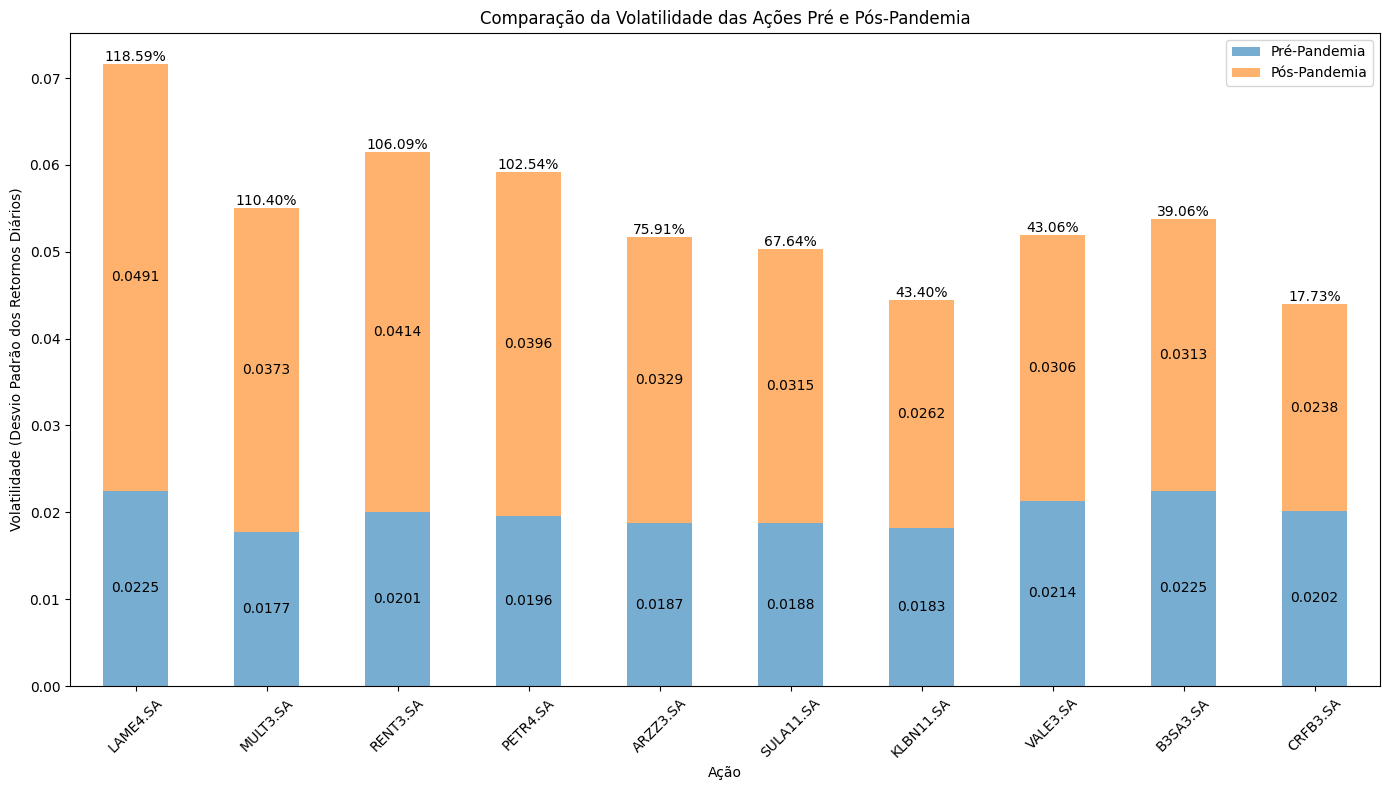

In [16]:
# Definir as cores para pré e pós-pandemia
cores = ['#1f77b4', '#ff7f0e']  # Azul para pré-pandemia e laranja para pós-pandemia

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 8))

# Gráfico de barras para a volatilidade antes da pandemia
comparacao['Antes'].plot(kind='bar', color=cores[0], alpha=0.6, label='Pré-Pandemia', ax=ax)

# Gráfico de barras para a volatilidade depois da pandemia
comparacao['Depois'].plot(kind='bar', color=cores[1], alpha=0.6, label='Pós-Pandemia', ax=ax, bottom=comparacao['Antes'])

# Adicionar rótulos e título
ax.set_xlabel('Ação')
ax.set_ylabel('Volatilidade (Desvio Padrão dos Retornos Diários)')
ax.set_title('Comparação da Volatilidade das Ações Pré e Pós-Pandemia')
ax.legend()

# Adicionar os valores de pré e pós-pandemia ao centro e os valores de variação (%) acima de cada barra
for i in range(len(comparacao)):
    ax.text(i, comparacao['Antes'][i] / 2, f"{comparacao['Antes'][i]:.4f}", ha='center', va='center', fontsize=10, color='black')
    ax.text(i, comparacao['Antes'][i] + (comparacao['Depois'][i] / 2), f"{comparacao['Depois'][i]:.4f}", ha='center', va='center', fontsize=10, color='black')
    ax.text(i, comparacao['Antes'][i] + comparacao['Depois'][i], f"{comparacao['Variação (%)'][i]:.2f}%", ha='center', va='bottom', fontsize=10, color='black')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### **Análise dos Resultados**
  
A tabela e o gráfico acima revelam mudanças significativas no perfil de risco das ações analisadas nos períodos pré e pós-pandemia. Os principais pontos são:
  
1. **Aumento Generalizado do Risco**: Todas as ações examinadas apresentaram um incremento na volatilidade após o início da pandemia. Este fenômeno indica uma elevação global do risco no mercado acionário, refletindo a incerteza econômica e a instabilidade geradas pela crise sanitária. O aumento generalizado sugere que nenhum setor ficou imune aos impactos da pandemia, embora a intensidade tenha variado.
  
2. **Variação Significativa entre Ativos**: O aumento da volatilidade não foi uniforme, oscilando consideravelmente entre as diferentes ações. A variação percentual flutuou de 17,73% (CRFB3.SA) a 118,59% (LAME4.SA), evidenciando impactos distintos da pandemia em diferentes setores. Esta disparidade ressalta a importância de uma análise setorial aprofundada ao avaliar investimentos em períodos de crise.
  
3. **Ações Mais Impactadas**: 
     - LAME4.SA: Apresentou o maior aumento de volatilidade (118,59%), possivelmente refletindo os desafios enfrentados pelo varejo tradicional durante a crise sanitária. O fechamento de lojas físicas, a mudança para o e-commerce e as incertezas sobre o comportamento do consumidor provavelmente contribuíram para esta alta volatilidade.
     - MULT3.SA: Com aumento de 110,40%, provavelmente devido ao impacto no setor imobiliário comercial. O fechamento de shopping centers, a redução no fluxo de pessoas e as mudanças nos hábitos de consumo possivelmente influenciaram esta volatilidade.
     - RENT3.SA: Terceiro maior aumento (106,09%), possivelmente refletindo as incertezas no setor de locação de veículos durante a pandemia. A redução na demanda por aluguel de carros e as mudanças nos padrões de mobilidade podem ter contribuído para esta alta volatilidade.
  
4. **Ações Menos Afetadas**:
     - CRFB3.SA: Registrou o menor aumento de volatilidade (17,73%), possivelmente devido à natureza mais estável do setor de varejo alimentar. A classificação como serviço essencial e a demanda contínua por alimentos e produtos básicos podem ter contribuído para esta relativa estabilidade.
     - B3SA3.SA: Segundo menor aumento (39,06%), sugerindo uma relativa estabilidade no setor financeiro. A continuidade das operações da bolsa de valores e a demanda por serviços financeiros podem ter ajudado a manter a volatilidade mais controlada em comparação com outros setores.
  
5. **Alteração no Perfil de Risco**: Algumas ações anteriormente consideradas de baixo risco tornaram-se significativamente mais voláteis (ex: LAME4.SA, MULT3.SA). Outras mantiveram um aumento mais moderado na volatilidade (ex: CRFB3.SA, B3SA3.SA).
  
### **Conclusão**
 A pandemia alterou substancialmente o perfil de risco de todas as ações analisadas, embora em diferentes magnitudes. Isso ressalta a importância de uma reavaliação constante do risco dos investimentos, especialmente em períodos de turbulência econômica. A análise demonstra que mesmo setores tradicionalmente considerados mais estáveis podem sofrer aumentos significativos de volatilidade em situações de crise global.
  
 Esta análise também evidencia como eventos globais podem impactar setores econômicos de maneiras distintas, reforçando a importância da diversificação na gestão de riscos de uma carteira de investimentos. A compreensão dessas dinâmicas é crucial para investidores e gestores de portfólio na adaptação de suas estratégias em face de mudanças significativas no cenário econômico global. Além disso, destaca-se a necessidade de uma abordagem flexível e adaptativa na gestão de investimentos, capaz de responder rapidamente a mudanças nas condições de mercado e nos perfis de risco dos ativos.

# 4. Diversificação


## 4.1. Uma Estratégia Eficaz para Redução de Risco

Uma estratégia fundamental para mitigar o risco em uma carteira de investimentos é a diversificação, que consiste em incluir ativos com baixa correlação entre si. Esta abordagem é eficaz porque, quando um ativo apresenta desempenho negativo, outro pode manter-se estável ou até mesmo valorizar-se. Do mesmo modo, quando os ativos são altamente correlacionados, perde-se o benefício da diversificação, situação comumente descrita pelo ditado "não coloque todos os ovos na mesma cesta".

Para analisar o grau de diversificação da carteira estudada, foi criada uma matriz de correlação utilizando o coeficiente de *Pearson*. Esta matriz mostra a relação entre cada par de ações e, assim, fornece insights valiosos sobre a estrutura de risco do portfólio.

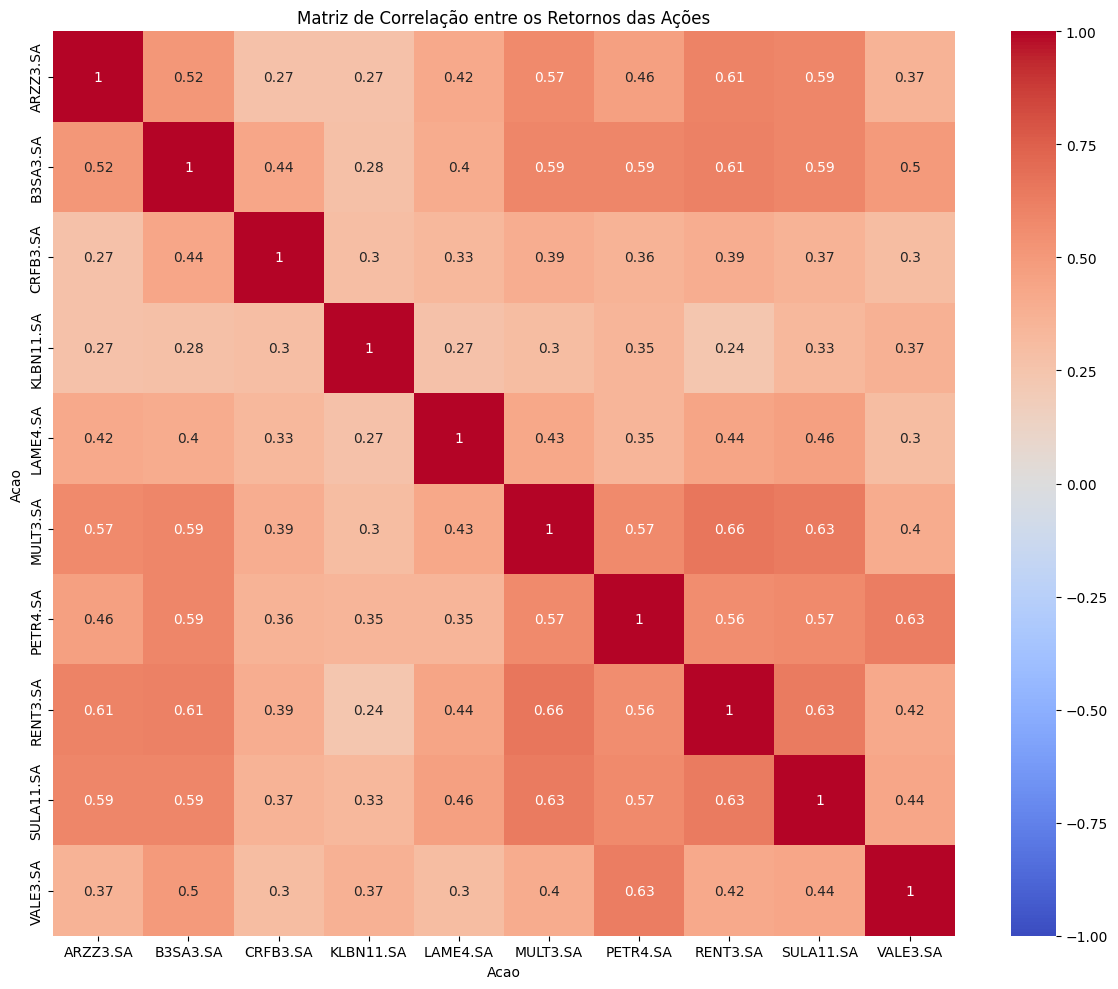

In [17]:
# Criar um DataFrame pivotado com os retornos de cada ação
retornos_pivot = df.pivot(index='Data', columns='Acao', values='Retorno')

# Calcular a matriz de correlação
matriz_correlacao = retornos_pivot.corr()

# Criar um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação entre os Retornos das Ações')
plt.tight_layout()
plt.show()

#### **Análise da matriz de correlação**:
Baseado na matriz de correlação apresentada, percebe-se que a maioria dos ativos da carteira do investidor apresenta correlação positiva entre si, variando entre fraca e moderada. Além disso, percebe-se também que não há correlações negativas significativas, o que é ideal para uma diversificação mais efetiva.

* **Ativos mais correlacionados**: MULT3.SA e RENT3.SA têm a maior correlação (0.70), seguidos por MULT3.SA e SULA11.SA (0.66) e B3SA3.SA e RENT3.SA (0.65).

* **Ativos menos correlacionados**: LAME4.SA parece ser o ativo menos correlacionado com os demais, com correlações variando de 0.18 (com VALE3.SA) a 0.30 (com SULA11.SA). A KLBN11.SA também mostra correlações relativamente baixas com a maioria dos outros ativos.

* **Diversificação**: Embora haja alguma diversificação, a carteira não está idealmente diversificada, já que todos os ativos têm correlações positivas. A ausência de correlações negativas limita o potencial de redução de risco através da diversificação.

## 4.2. **Matriz de correlação pré/pós pandemia**:
Para comparar a correlação dos ativos antes e depois da pandemia, é necessário calcular as matrizes de correlação separadas para os dois períodos. No entanto, baseado na análise sobre as mudanças na volatilidade (risco) entre os períodos pré e pós pandemia, pode-se inferir que:
* É provável que as correlações tenham aumentado após o início da pandemia, especialmente durante o período inicial de choque do mercado. Isso ocorre porque, em momentos de crise, os investidores tendem a reagir de maneira semelhante, resultando em movimentos mais sincronizados entre os ativos.
* Ativos de setores mais afetados pela pandemia (como LAME4.SA e MULT3.SA) podem ter visto mudanças mais significativas em suas correlações com outros ativos. Esses setores enfrentaram desafios específicos, como interrupções na cadeia de suprimentos e mudanças no comportamento do consumidor, que podem ter alterado a forma como esses ativos se relacionam com o mercado em geral.
* Ativos de setores mais estáveis ou menos afetados (como CRFB3.SA) podem ter mantido padrões de correlação mais consistentes. Setores essenciais, como alimentos e produtos de consumo básico, tendem a ser menos voláteis e menos impactados por crises econômicas, resultando em correlações mais estáveis.

Para uma análise mais precisa da mudança nas correlações, é necessário calcular as matrizes de correlação separadas para os períodos pré e pós-pandemia e comparar as diferenças nas correlações entre os dois períodos. 

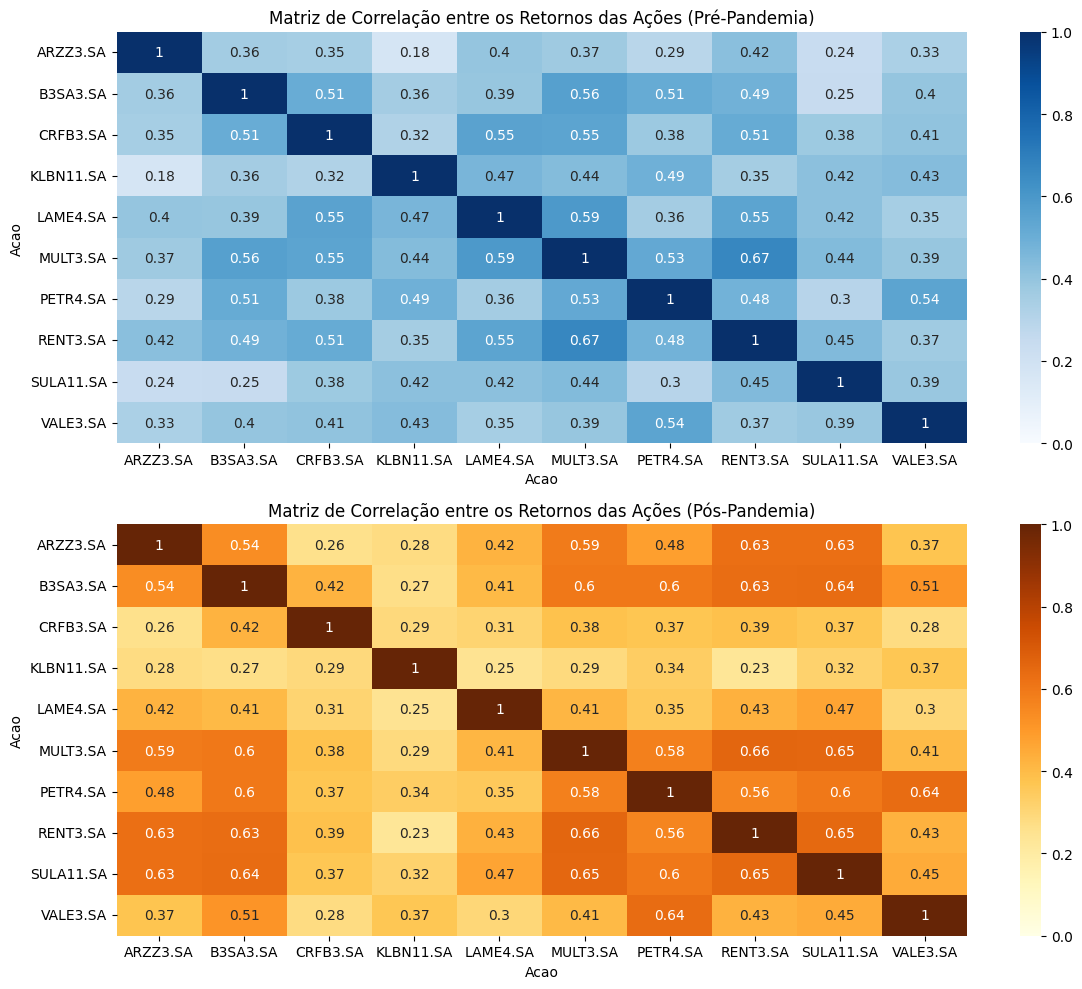

In [18]:
# Definir o ponto de corte da pandemia
data_corte = pd.to_datetime('2020-03-01')

# Filtrar os dados para os períodos pré e pós-pandemia
dados_pre_pandemia = df[df['Data'] < data_corte]
dados_pos_pandemia = df[df['Data'] >= data_corte]

# Criar DataFrames pivotados com os retornos de cada ação para os dois períodos
retornos_pre_pandemia = dados_pre_pandemia.pivot(index='Data', columns='Acao', values='Retorno')
retornos_pos_pandemia = dados_pos_pandemia.pivot(index='Data', columns='Acao', values='Retorno')

# Calcular as matrizes de correlação para os dois períodos
matriz_correlacao_pre = retornos_pre_pandemia.corr()
matriz_correlacao_pos = retornos_pos_pandemia.corr()

# Criar mapas de calor das matrizes de correlação
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.heatmap(matriz_correlacao_pre, annot=True, cmap='Blues', vmin=0, vmax=1, center=0.5)
plt.title('Matriz de Correlação entre os Retornos das Ações (Pré-Pandemia)')
plt.tight_layout()

plt.subplot(2, 1, 2)
sns.heatmap(matriz_correlacao_pos, annot=True, cmap='YlOrBr', vmin=0, vmax=1, center=0.5)
plt.title('Matriz de Correlação entre os Retornos das Ações (Pós-Pandemia)')
plt.tight_layout()

plt.show()

A análise das matrizes revela algumas mudanças importantes nas relações entre os retornos das ações. Aqui estão os principais pontos observados:

#### **4.2.1. Matriz de Correlação Pré-Pandemia**
* **Correlação Moderada**: A maioria das ações apresenta correlações moderadas entre si, variando entre 0.18 e 0.67.

* **Ações Menos Correlacionadas**: KLBN11.SA tem correlações relativamente baixas com outras ações, especialmente com ARZZ3.SA (0.18) e LAME4.SA (0.27).

* **Ações Mais Correlacionadas**: RENT3.SA e MULT3.SA têm uma correlação relativamente alta (0.67), indicando que seus retornos se movem de maneira semelhante.

#### **4.2.2. Matriz de Correlação Pós-Pandemia**
* **Aumento Geral nas Correlações**: Observa-se um aumento geral nas correlações entre as ações. Por exemplo, a correlação entre ARZZ3.SA e B3SA3.SA aumentou de 0.36 para 0.54.

* **Ações Mais Correlacionadas**: RENT3.SA e MULT3.SA continuam a ter uma correlação alta (0.65), mas agora outras ações também mostram correlações mais fortes, como ARZZ3.SA e RENT3.SA (0.63).

* **Ações Menos Correlacionadas**: KLBN11.SA ainda apresenta correlações relativamente baixas, mas houve um aumento em algumas correlações, como com SULA11.SA (de 0.38 para 0.37).

#### **4.2.3. Comparação e Avaliação**
* **Aumento na Correlação**: A pandemia parece ter aumentado a correlação entre a maioria das ações. Isso é comum em períodos de crise, onde os mercados tendem a se mover de maneira mais sincronizada devido a fatores macroeconômicos que afetam todos os setores.

* **Impacto na Diversificação**: O aumento nas correlações reduz os benefícios da diversificação, pois os ativos se movem de maneira mais semelhante. Isso pode aumentar o risco da carteira, já que a diversificação é menos eficaz.

* **Setores Específicos**: Ações de setores mais afetados pela pandemia, como LAME4.SA, mostram mudanças significativas nas correlações. Por exemplo, a correlação de LAME4.SA com MULT3.SA aumentou de 0.43 para 0.59.

* **Estabilidade Relativa**: Algumas ações, como CRFB3.SA, mantiveram correlações relativamente estáveis, sugerindo que setores essenciais, como o varejo alimentar, foram menos impactados em termos de correlação.

#### **4.2.4. Resumindo**
A pandemia de COVID-19 teve um impacto significativo nas correlações entre os retornos das ações, aumentando a sincronização dos movimentos de mercado. Isso ressalta a importância de reavaliar estratégias de diversificação e gerenciamento de risco em períodos de crise. Investidores devem considerar a possibilidade de correlações mais altas em suas análises de risco e ajustar suas carteiras de acordo para mitigar os impactos negativos.

# 5. Conclusão

O estudo realizado demonstrou que a pandemia de COVID-19 impactou significativamente o comportamento desse grupo de ações do mercado brasileiro, com variações claras na volatilidade e no desempenho geral das empresas. A análise dos períodos pré e pós-pandemia revelou que:

1. **Aumento Generalizado da Volatilidade**: Todos os ativos apresentaram um incremento em sua volatilidade após o início da pandemia, com destaque para setores mais vulneráveis, como o varejo e o imobiliário. LAME4.SA e MULT3.SA foram as ações mais impactadas, refletindo as dificuldades enfrentadas por esses setores durante a crise.

2. **Diferenças Setoriais no Risco**: Ativos de setores mais estáveis, como o varejo alimentar (CRFB3.SA), mostraram uma menor variação na volatilidade, enquanto ativos fortemente expostos a fatores econômicos (ex: petróleo e varejo) experimentaram aumentos expressivos no risco.

3. **Diversificação da Carteira**: Embora a carteira analisada apresente alguma diversificação, as correlações positivas entre os ativos limitaram o potencial de redução de risco. A pandemia intensificou essa limitação ao aumentar a correlação entre os ativos, reduzindo os benefícios da diversificação em um momento de crise global.

## 5.1. Melhorias no projeto 
Apesar de o desvio padrão ser uma medida amplamente utilizada para quantificar a volatilidade, ele oferece uma visão limitada do risco, pois se concentra nas flutuações médias dos retornos. Para uma análise mais robusta do risco de uma carteira, é fundamental incluir outras métricas. O VaR (Value at Risk) oferece uma visão mais aprofundada ao quantificar o risco em termos de perdas potenciais dentro de um horizonte temporal específico e com um nível de confiança definido. Essa medida, amplamente utilizada por gestores de portfólios, permite que os investidores e gestores entendam o pior cenário esperado em condições normais de mercado, o que é essencial em tempos de elevada incerteza, como durante a pandemia.  

Dado o aumento da volatilidade observado durante a pandemia, a aplicação do VaR na carteira analisada se torna não apenas uma etapa natural, mas também essencial para avaliar os riscos potenciais de forma mais completa. A segunda parte deste estudo utilizará o VaR como uma medida de risco alternativa à essa mesma carteira de ações. Espera-se conseguir quantificar as possíveis perdas em diferentes cenários e fornecer uma avaliação ainda mais detalhada sobre o impacto da pandemia no risco da carteira. 